<a href="https://colab.research.google.com/github/Lyynn777/Instagram-Feed-Analyzer/blob/main/DataAnalyticsInsta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Instagram_Analytics.csv to Instagram_Analytics.csv


In [3]:
df = pd.read_csv(list(uploaded.keys())[0], sep=',')
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


In [8]:
# Basic analytics
total_likes = df['likes'].sum()
avg_likes = df['likes'].mean()

top_post = df.loc[df['likes'].idxmax()]
low_post = df.loc[df['likes'].idxmin()]

common_media = df['media_type'].value_counts().idxmax()
common_traffic = df['traffic_source'].value_counts().idxmax()
best_category = df.groupby("content_category")['followers_gained'].sum().idxmax()

print("===== Instagram Feed Insights Dashboard =====")
print(f"Total Posts      : {len(df)}")
print(f"Total Likes      : {total_likes:,}")
print(f"Average Likes    : {avg_likes:.2f}\n")

print("Top Liked Post:")
print(top_post, "\n")

print("Least Liked Post:")
print(low_post, "\n")

print(f"Most Common Media Type   : {common_media}")
print(f"Most Common Traffic Source: {common_traffic}")
print(f" Best Category for Followers Gained: {best_category}")


===== Instagram Feed Insights Dashboard =====
Total Posts      : 29999
Total Likes      : 2,997,279,941
Average Likes    : 99912.66

Top Liked Post:
post_id                              IG0025572
upload_date         2025-06-03 09:25:22.954916
media_type                                Reel
likes                                   200000
comments                                  6629
shares                                    3634
saves                                     3332
reach                                  1695246
impressions                            1955467
caption_length                            1121
hashtags_count                              25
followers_gained                            31
traffic_source                       Home Feed
engagement_rate                          10.92
content_category                          Food
Name: 25571, dtype: object 

Least Liked Post:
post_id                              IG0023912
upload_date         2025-02-05 09:25:22.954916
media

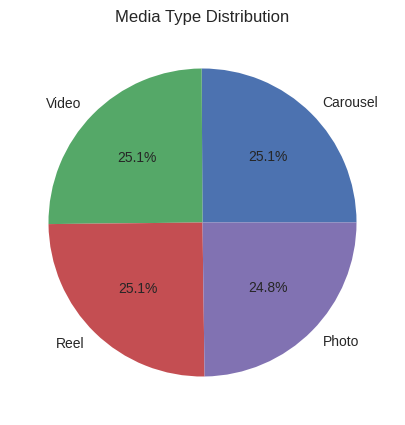

In [10]:
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(7,5))
df['media_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Media Type Distribution")
plt.ylabel("")
plt.show()



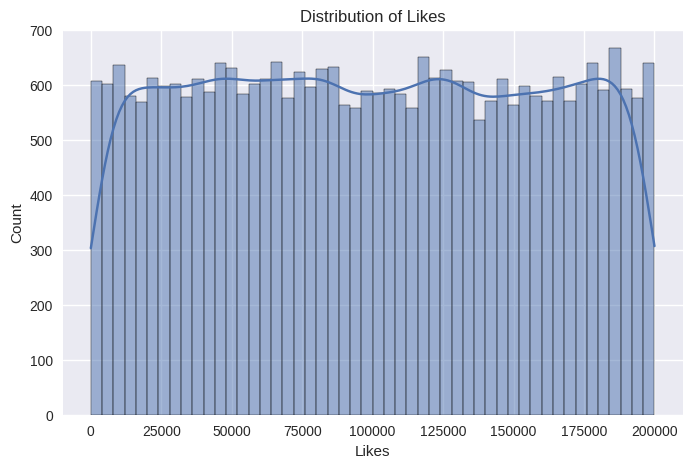

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['likes'], bins=50, kde=True)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Count")
plt.show()


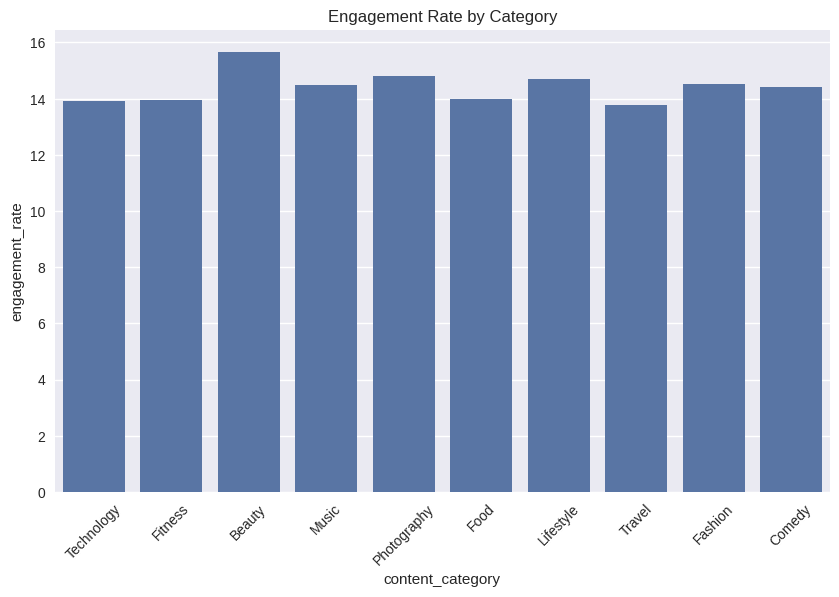

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='content_category', y='engagement_rate', data=df, errorbar=None)
plt.xticks(rotation=45)
plt.title("Engagement Rate by Category")
plt.show()

===== Sliding Window Analytics (7-Post Window) =====

Highest 7-post window total likes: 1,213,786

First rolling average impressions: 874,991.43
Last rolling average impressions: 1,687,113.14

Engagement spike detected at post index: 18

Longest streak of posts with ≥ 50,000 likes: 32 posts


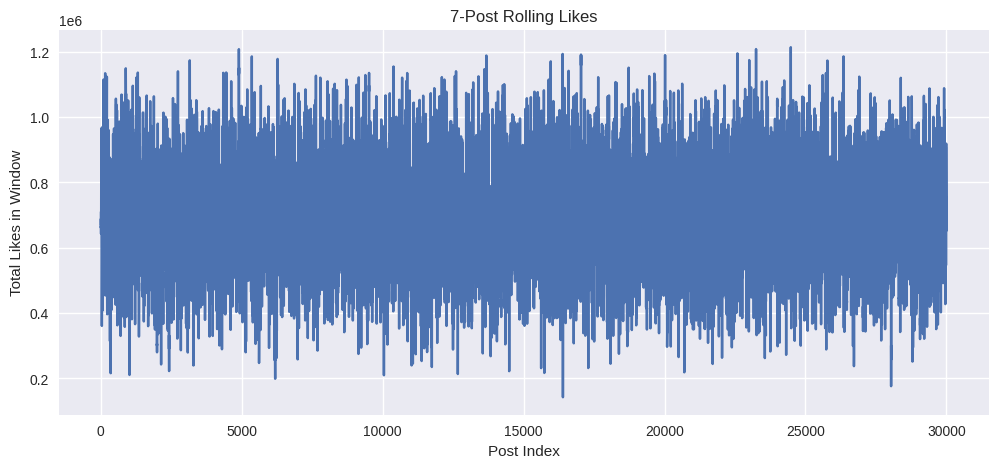

In [14]:
k = 7   # window size (7 posts)

print("===== Sliding Window Analytics (7-Post Window) =====\n")

# 1. Maximum likes in any 7-post window
rolling_likes = df['likes'].rolling(window=k).sum()
max_7_window_likes = rolling_likes.max()

print(f"Highest 7-post window total likes: {max_7_window_likes:,.0f}")

# 2. Rolling average impressions

rolling_avg_impressions = df['impressions'].rolling(window=k).mean()

print(f"\nFirst rolling average impressions: {rolling_avg_impressions.iloc[k-1]:,.2f}")
print(f"Last rolling average impressions: {rolling_avg_impressions.iloc[-1]:,.2f}")


# 3. Engagement spike detection (avg > threshold)

threshold = 20.0
rolling_avg_eng = df['engagement_rate'].rolling(window=k).mean()

spike_index = rolling_avg_eng[rolling_avg_eng > threshold].index.min()

if pd.isna(spike_index):
    print("\nNo engagement spike found (>20%)")
else:
    print(f"\nEngagement spike detected at post index: {spike_index}")

# 4. Longest streak of high-performing posts

min_like_threshold = 50000
likes_mask = df['likes'] >= min_like_threshold

# Detect consecutive runs
runs = likes_mask.astype(int)
longest_run = runs.groupby((runs != runs.shift()).cumsum()).transform('size') * runs
longest_streak = longest_run.max()

print(f"\nLongest streak of posts with ≥ {min_like_threshold:,} likes: {longest_streak} posts")

# OPTIONAL VISUALIZATION
plt.figure(figsize=(12,5))
rolling_likes.plot()
plt.title("7-Post Rolling Likes")
plt.xlabel("Post Index")
plt.ylabel("Total Likes in Window")
plt.show()
